#### CNBC API  참고 사이트 

https://rapidapi.com/apidojo/api/cnbc/

RAPID_API 키 사용하려면 가서 가입하시고 cnbc 팔로우 하시면
자동으로 API_KEY 부여 됩니다.

response 결과는 깃에서 보기 너무 길어서 
생략했습니다.

** 샵 제거하고 보시면 됩니다

In [1]:
import os 
import requests 
from dotenv import load_dotenv

In [2]:
from PIL import Image
import IPython
from io import BytesIO

In [3]:
# load dotenv
load_dotenv()

True

In [4]:
# RAPID_API KEY 설정 
api_key = os.getenv("RAPID_API_KEY")

#### get-meta-data

Get meta data that supports for other endpoints

In [7]:

url = "https://cnbc.p.rapidapi.com/get-meta-data"

headers = {
    "X-RapidAPI-Key": api_key,
    "X-RapidAPI-Host": "cnbc.p.rapidapi.com"
    }

response = requests.request("GET", url, headers=headers)

# print(response.text)
# print(response.json())

#### auto-complete 
querystring에 원하는 회사를 쿼리에 설정 
ex)
- querystring = {"q":"tesla"}

In [52]:
url = "https://cnbc.p.rapidapi.com/v2/auto-complete"

# 회사 설정 => 테슬라 
querystring = {"q":"tesla"}

headers = {
    "X-RapidAPI-Key": api_key,
    "X-RapidAPI-Host": "cnbc.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

# print(response.text)

In [65]:
# json으로 확인
# response.json()

## Get-chart

Get raw data to draw price line chart of stock quote, index, exchange, etc…

querystring:
- symbol: 종목코드 
- interval: 1d(하루), 1m(한달) , 5min(5분)

In [53]:
url = "https://cnbc.p.rapidapi.com/symbols/get-chart"

querystring = {"symbol":"36276","interval":"1min"}

headers = {
    "X-RapidAPI-Key": api_key,
    "X-RapidAPI-Host": "cnbc.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

# print(response.text)

In [70]:
# json으로 확인
# response.json()

#### Get-summary
Get summary information of stock quote, index, exchange, etc…

querystring
- issueIds: 종목 여러개 같이 입력

ex)
querystring = {"issueIds":"36276,24812378"}

In [55]:
url = "https://cnbc.p.rapidapi.com/symbols/get-summary"

querystring = {"issueIds":"36276,24812378"}

headers = {
    "X-RapidAPI-Key": api_key,
    "X-RapidAPI-Host": "cnbc.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

# print(response.text)

In [71]:
# json 으로 확인
# response.json()

#### get-priceline-chart

종목 차트 그려줍니다.
Generate image of price line chart of specific stock quote, index, exchange, etc…

querystring
- issueId: 종목코드 
- numberOfDays: 기간


In [57]:
url = "https://cnbc.p.rapidapi.com/symbols/get-priceline-chart"

querystring = {"issueId":"24812378","numberOfDays":"1"}

headers = {
    "X-RapidAPI-Key": api_key,
    "X-RapidAPI-Host": "cnbc.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

# print(response.text)

In [78]:
# 외부로 출력
img = Image.open(io.BytesIO(response.content))
img.show()

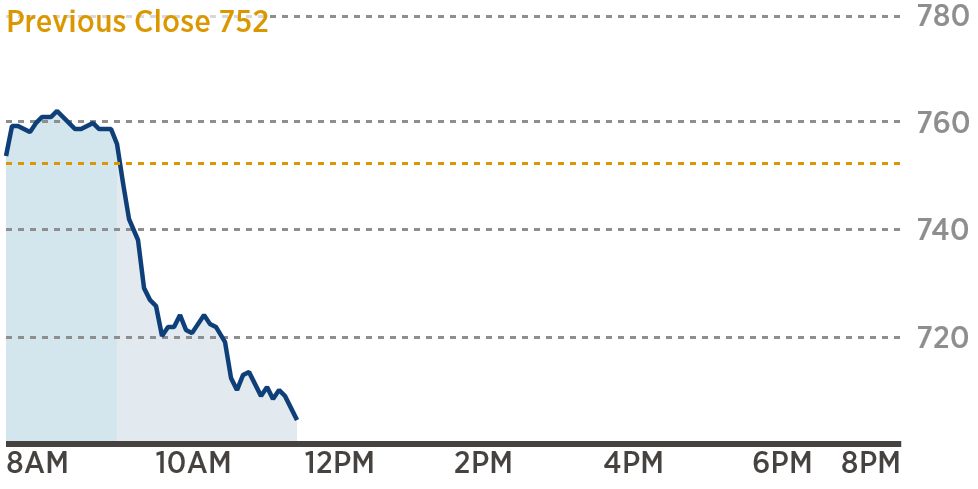

In [79]:
# 이미지 출력
img = response.content
IPython.display.Image(img,width = 500)

#### get-fundamentals
Get fundamental information of stock quote, index, exchange, etc
기본적인 주식 정보 제공 

querystring 
- issueIds: 종목 코드 여러개

In [58]:
url = "https://cnbc.p.rapidapi.com/symbols/get-fundamentals"

querystring = {"issueIds":"36276,24812378"}

headers = {
    "X-RapidAPI-Key": api_key,
    "X-RapidAPI-Host": "cnbc.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

# print(response.text)

In [72]:
# json으로 확인
# response.json()

#### get- list-indice 
List all available indices

In [59]:
url = "https://cnbc.p.rapidapi.com/market/list-indices"

headers = {
    "X-RapidAPI-Key": api_key,
    "X-RapidAPI-Host": "cnbc.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers)

# print(response.text)

In [73]:
# json으로 확인
# response.json()

# News 데이터

트렌딩 뉴스 제공

querystring 
- tag : 항상 Articles로 설정
- count: 뉴스 숫자 설정

In [60]:
url = "https://cnbc.p.rapidapi.com/news/v2/list-trending"

querystring = {"tag":"Articles","count":"10"}

headers = {
    "X-RapidAPI-Key": api_key,
    "X-RapidAPI-Host": "cnbc.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

# print(response.text)

In [74]:
#json 
# response.json()

In [38]:
# json dict, keys
response.json().keys()

dict_keys(['data', 'extensions'])

In [39]:
# 뉴스 데이터 컬럼 목록
response.json()['data']['mostPopularEntries']['assets'][0].keys()

dict_keys(['__typename', 'id', 'headline', 'shorterHeadline', 'dateLastPublished', 'description', 'pageName', 'relatedTagsFilteredFormatted', 'dateFirstPublished', 'sectionHierarchyFormatted', 'authorFormatted', 'shortDateFirstPublished', 'shortDateLastPublished', 'url', 'type', 'premium', 'promoImage', 'featuredMedia', 'section'])

In [40]:
# 뉴스 하나 확인 
response.json()['data']['mostPopularEntries']['assets'][0]

{'__typename': 'cnbcnewsstory',
 'id': 107078345,
 'headline': 'I talked to 70 parents who raised highly successful adults: 4 things they refused to do with their kids',
 'shorterHeadline': 'I talked to 70 parents who raised highly successful adults—here are 4 things they refuse to do',
 'dateLastPublished': '2022-07-10T12:28:26+0000',
 'description': "Parenting expert and author Margot Bisnow, who is a mother to two entrepreneurial sons, interviewed 70 families about how to to raise resilient, happy and successful kids. Here's what she learned about what not to do.",
 'pageName': '107078345|2022/07/09/i-talked-to-70-parents-who-raised-highly-successful-adults-here-is-what-they-did-differently',
 'relatedTagsFilteredFormatted': 'hobbies|business|psychology|make it contributors|parenting|entrepreneurship|entrepreneur|parents|children|relationships|selfimprovement',
 'dateFirstPublished': '2022-07-09T14:28:43+0000',
 'sectionHierarchyFormatted': 'make it success|make it raising successfu

### list-by-symbol
List latest news by symbol name

최근 뉴스 리스트 주식 회사 관련 제공

querystring 
- symbol : 주식회사 코드 ex) "AAPL" (Apple)
- page: 페이지수 ex) page:"1"
- pageSize: 페이지 크기 pageSize:"30"

In [61]:
url = "https://cnbc.p.rapidapi.com/news/v2/list-by-symbol"

querystring = {"symbol":"AAPL","page":"1","pageSize":"5"}

headers = {
    "X-RapidAPI-Key": api_key,
    "X-RapidAPI-Host": "cnbc.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

# print(response.text)

In [75]:
# response.json()

In [137]:
# 뉴스 결과 데이터 키 목록
response.json()['data']['symbolEntries']['results'][0].keys()

dict_keys(['__typename', 'headline', 'pageName', 'description', 'dateFirstPublished', 'relatedTagsFilteredFormatted', 'sectionHierarchyFormatted', 'authorFormatted', 'shortDateFirstPublished', 'shortDateLastPublished', 'shorterHeadline', 'id', 'type', 'title', 'url', 'dateLastPublished', 'premium', 'promoImage', 'section', 'tickerSymbols'])

In [138]:
# 뉴스 하나 확인
response.json()['data']['symbolEntries']['results'][0]

{'__typename': 'cnbcnewsstory',
 'headline': "Santoli: Stocks stumble on Covid caution and recession worries, but the rebound's fate is uncertain",
 'pageName': '107086886|2022/07/11/santoli-stocks-stumble-on-covid-caution-and-recession-worries-but-the-rebounds-fate-is-uncertain',
 'description': 'This is the daily notebook of Mike Santoli, CNBC’s senior markets commentator, with ideas about trends, stocks and market statistics.',
 'dateFirstPublished': '2022-07-11T16:20:55+0000',
 'relatedTagsFilteredFormatted': 'investment strategy|sp 500 index|apple inc',
 'sectionHierarchyFormatted': 'pro home|cnbc pro|pro santoli on stocks',
 'authorFormatted': 'NA',
 'shortDateFirstPublished': '07/11/2022',
 'shortDateLastPublished': '07/11/2022',
 'shorterHeadline': "Santoli: Stocks stumble on recession worries. The rebound's fate is uncertain",
 'id': 107086886,
 'type': 'cnbcnewsstory',
 'title': "Santoli: Stocks stumble on Covid caution and recession worries, but the rebound's fate is uncerta

### list-special-reports 

List special reports
특보 리스트 제공 

querystring 
- PageSize: 페이지 사이즈 
- page : 페이지 수 

In [81]:
url = "https://cnbc.p.rapidapi.com/news/v2/list-special-reports"

querystring = {"pageSize":"5","page":"1"}

headers = {
    "X-RapidAPI-Key": api_key,
    "X-RapidAPI-Host": "cnbc.p.rapidapi.com"
}

response = requests.request("GET", url, headers=headers, params=querystring)

# print(response.text)

In [89]:
# response.json()

In [87]:
# 뉴스 데이터 키 목록
response.json()['data']['specialReportsEntries']['results'][0].keys()

dict_keys(['__typename', 'id', 'type', 'headline', 'shorterHeadline', 'description', 'pageName', 'relatedTagsFilteredFormatted', 'dateFirstPublished', 'sectionHierarchyFormatted', 'authorFormatted', 'shortDateFirstPublished', 'shortDateLastPublished', 'url', 'dateLastPublished', 'premium', 'promoImage', 'section', 'featuredMedia', 'duration', 'playbackURL', 'vcpsId'])

In [88]:
response.json()['data']['specialReportsEntries']['results'][0]

{'__typename': 'cnbcvideo',
 'id': 107086729,
 'type': 'cnbcvideo',
 'headline': "Bitcoin will hit new all-time highs over next year, says CoinShares' Meltem Demirors",
 'shorterHeadline': "Bitcoin will hit new all-time highs over next year, says CoinShares' Meltem Demirors",
 'description': "Meltem Demirors, CoinShares chief strategy officer, joins CNBC's 'Squawk Box' to lay out her outlook for bitcoin and other cryptocurrencies ahead of the open on Monday.",
 'pageName': '7000253275|video/2022/07/11/bitcoin-will-hit-new-all-time-highs-over-next-year-says-coinshares-meltem-demirors',
 'relatedTagsFilteredFormatted': 'bitcoin|cryptocurrency',
 'dateFirstPublished': '2022-07-11T11:30:49+0000',
 'sectionHierarchyFormatted': 'cnbc tv|squawk box us',
 'authorFormatted': 'NA',
 'shortDateFirstPublished': '07/11/2022',
 'shortDateLastPublished': '07/11/2022',
 'url': 'https://www.cnbc.com/video/2022/07/11/bitcoin-will-hit-new-all-time-highs-over-next-year-says-coinshares-meltem-demirors.html